In [44]:
import pandas as pd
from sklearn import linear_model
from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('dados_cerveja_nota.xlsx')

In [4]:
df.head()

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20


In [11]:
X = df[['cerveja']]

In [6]:
y = df['nota']

In [56]:
reg = linear_model.LinearRegression() #Modelo ajustado
arvore_full = tree.DecisionTreeRegressor(random_state=42)
arvore_d2 = tree.DecisionTreeRegressor(random_state=42, max_depth = 2) # mudança no hiperparametro

In [57]:
reg.fit(X, y) # Aprendizado de máquina
arvore_full.fit(X,y)
arvore_d2.fit(X,y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [40]:
a, b = reg.intercept_, reg.coef_[0]

In [41]:
a, b

(np.float64(0.15161290322580534), np.float64(1.0362903225806452))

In [58]:
predict_reg = reg.predict(X.drop_duplicates()) # Predição em cima dos dados unicos
predict_arvore_full = arvore_full.predict(X.drop_duplicates())
predict_arvore_d2 = arvore_d2.predict(X.drop_duplicates())

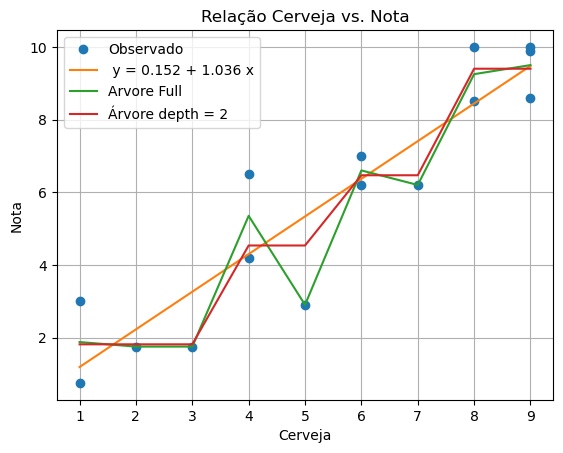

In [59]:
plt.plot(X['cerveja'], y, 'o')
plt.grid(True)
plt.title('Relação Cerveja vs. Nota')
plt.xlabel('Cerveja')
plt.ylabel('Nota')
plt.plot(X.drop_duplicates()['cerveja'], predict_reg)
plt.plot(X.drop_duplicates()['cerveja'], predict_arvore_full)
plt.plot(X.drop_duplicates()['cerveja'], predict_arvore_d2)
# Plotagem de pontos e predição
plt.legend(['Observado', f' y = {a:.3f} + {b:.3f} x',
           'Arvore Full',
            'Árvore depth = 2'
           ])


Árvore full está `overfittando`